In [1]:
import cv2,os
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
from PIL import Image
from tqdm import tqdm
import seaborn as sns

In [2]:
cam = "ScoreCAM"
chip = "H3K27ac"
layer = "layer2"
chip_li = ["All", "H3K27ac", "CTCF", "Hoechst"]
ctrl_name = cam+"_Ctrl_"+chip+"_"+layer
vpa_name = cam+"_VPA_"+chip+"_"+layer
CAM_Ctrl_CHIP = np.load("./Datasets/"+ctrl_name+".npy",allow_pickle=True)
CAM_VPA_CHIP  = np.load("./Datasets/"+vpa_name+".npy",allow_pickle=True)
print(ctrl_name,CAM_Ctrl_CHIP.shape)
print(vpa_name,CAM_VPA_CHIP.shape)

ScoreCAM_Ctrl_H3K27ac_layer2 (2998, 600, 600)
ScoreCAM_VPA_H3K27ac_layer2 (2997, 600, 600)


0.9929198
0.981457


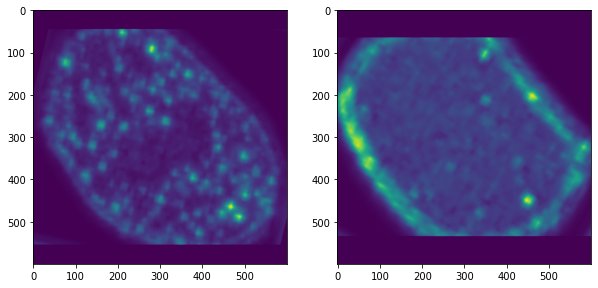

In [3]:
print(CAM_Ctrl_CHIP[1].max())
print(CAM_VPA_CHIP[1].max())
vmin, vmax = 0.0, max(CAM_Ctrl_CHIP[1].max(),CAM_VPA_CHIP[1].max())
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(CAM_Ctrl_CHIP[1], vmin=vmin, vmax=vmax)
plt.subplot(1,2,2)
plt.imshow(CAM_VPA_CHIP[1], vmin=vmin, vmax=vmax)

# Pixel average

In [78]:
AVG_CAM_Ctrl_CHIP = np.zeros([600,600])
for i in tqdm(range(CAM_Ctrl_CHIP.shape[0])):
    AVG_CAM_Ctrl_CHIP+=CAM_Ctrl_CHIP[i]
AVG_CAM_VPA_CHIP = np.zeros([600,600])
for i in tqdm(range(CAM_VPA_CHIP.shape[0])):
    AVG_CAM_VPA_CHIP+=CAM_VPA_CHIP[i]
AVG_CAM_Ctrl_CHIP/=CAM_Ctrl_CHIP.shape[0]
AVG_CAM_VPA_CHIP/=CAM_VPA_CHIP.shape[0]

100%|████████████████████████████████████████████████████| 2992/2992 [00:01<00:00, 2859.09it/s]


0.19984409269127476
0.25196315345956805


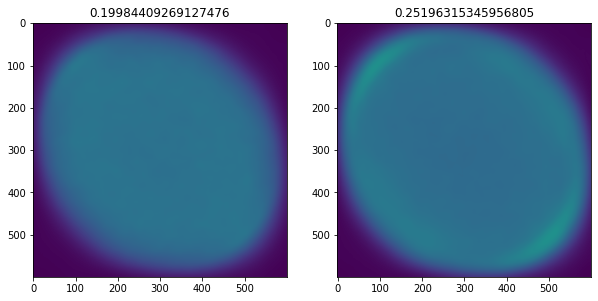

In [79]:
print(AVG_CAM_Ctrl_CHIP.max())
print(AVG_CAM_VPA_CHIP.max())
vmin, vmax = 0.0, 0.5
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title(AVG_CAM_Ctrl_CHIP.max())
plt.imshow(AVG_CAM_Ctrl_CHIP, vmin=vmin, vmax=vmax)
plt.subplot(1,2,2)
plt.title(AVG_CAM_VPA_CHIP.max())
plt.imshow(AVG_CAM_VPA_CHIP, vmin=vmin, vmax=vmax)

# Pixel intensity

In [80]:
intensity_CAM_Ctrl_CHIP = CAM_Ctrl_CHIP.mean(axis=(1, 2))
intensity_CAM_VPA_CHIP = CAM_VPA_CHIP.mean(axis=(1, 2))
print(intensity_CAM_Ctrl_CHIP.shape)
print(intensity_CAM_VPA_CHIP.shape)
df = pd.DataFrame({'Ctrl': intensity_CAM_Ctrl_CHIP[:2900], 'VPA': intensity_CAM_VPA_CHIP[:2900]})
df.index = np.arange(1, len(df) + 1)
df.to_csv(vpa_name+".csv", index=True, index_label="num")
print(df)

(2990,)
(2992,)
          Ctrl       VPA
1     0.130687  0.203968
2     0.101650  0.141675
3     0.148355  0.149478
4     0.096457  0.122872
5     0.148278  0.121462
...        ...       ...
2896  0.161754  0.143560
2897  0.159165  0.222305
2898  0.212721  0.209439
2899  0.118535  0.197541
2900  0.137171  0.199506

[2900 rows x 2 columns]
